In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
dataset = pd.read_csv('http://iali.in/datasets/Social_Network_Ads.csv')

In [3]:
dataset.info

<bound method DataFrame.info of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]>

In [4]:
dataset.describe

<bound method NDFrame.describe of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]>

In [5]:
dataset.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [0]:
dataset['Gender'] = dataset['Gender'].astype('category').cat.codes

In [7]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


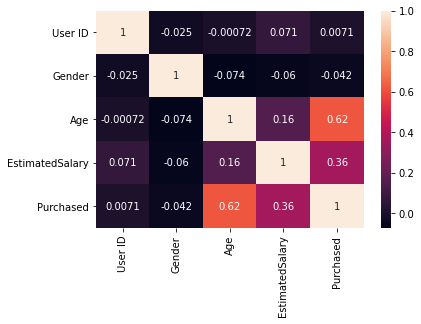

In [8]:
sns.heatmap(dataset.corr(), annot=True)

In [0]:
features = ['Gender','Age', 'EstimatedSalary']

In [0]:
#Splitting whole dataset
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=0.2)

In [0]:
X_train, X_test = train[features], test[features]
y_train, y_test = train['Purchased'], test['Purchased']

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve

In [13]:
#Decision Tree Classifier
dtcmodel = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=1)
dtcmodel.fit(X_train,y_train)

predictions = dtcmodel.predict(X_test) 
cm = confusion_matrix(y_test, predictions)
TP, TN = cm[1,1], cm[0,0]
FP, FN = cm[0,1], cm[1,0]
print('Accuracy', (TP+TN)/(TP+TN+FP+FN))
print(accuracy_score(y_test,predictions))

Accuracy 0.9125
0.9125


In [0]:
dtc_fpr, dtc_tpr, dtc_thresholds = roc_curve(y_test, predictions)

In [15]:
#Random Forest Classifier
rfcmodel = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=3, random_state=1)
rfcmodel.fit(X_train,y_train)

predictions = rfcmodel.predict(X_test) 
cm = confusion_matrix(y_test, predictions) 
TP, TN = cm[1,1], cm[0,0]
FP, FN = cm[0,1], cm[1,0]
print('Accuracy', (TP+TN)/(TP+TN+FP+FN))

Accuracy 0.925


In [0]:
rfc_fpr, rfc_tpr, rfc_thresholds = roc_curve(y_test, predictions)

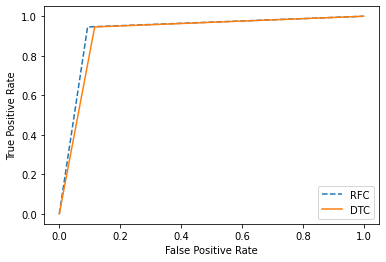

In [17]:
#Plotting ROC curve
plt.plot(rfc_fpr, rfc_tpr, linestyle='--', label='RFC')
plt.plot(dtc_fpr, dtc_tpr, linestyle='solid', label='DTC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()